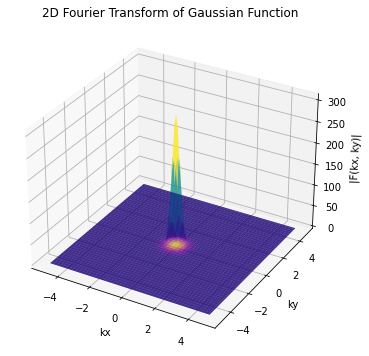

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Gaussian function
def gaussian(x, y):
    return np.exp(-(x**2 + y**2))

# Define the range of x and y values
N = 100
x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)

# Create a meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Compute the Gaussian function values
f_xy = gaussian(X, Y)

# Compute the 2D Fourier transform using numpy's fft2
F_kxky = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f_xy)))

# Define the kx and ky values corresponding to the Fourier transform
kx = np.fft.fftshift(np.fft.fftfreq(N, d=(x[1] - x[0])))
ky = np.fft.fftshift(np.fft.fftfreq(N, d=(y[1] - y[0])))

# Create a meshgrid for kx and ky
KX, KY = np.meshgrid(kx, ky)

# Compute the analytical Fourier transform
analytical_F = np.exp(-np.pi * (KX**2 + KY**2))

# Plotting the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the numerical Fourier transform
ax.plot_surface(KX, KY, np.abs(F_kxky), cmap='viridis', alpha=0.6, label='Numerical')

# Plot the analytical Fourier transform
ax.plot_surface(KX, KY, analytical_F, cmap='plasma', alpha=0.6, label='Analytical')

ax.set_title('2D Fourier Transform of Gaussian Function')
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('|F(kx, ky)|')
plt.show()